There's been various concerns about the SHAMs I've made being done correctly. I'm going to take a look at the clustering of them all in the same notebook for easy comparison.

In [2]:
import numpy as np
import astropy
from halotools.mock_observables import tpcf

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
%%bash
ls ../../bin/shams/*.npy

../../bin/shams/catalog_ab_halo_mpeak_catalog_cen_hod.npy
../../bin/shams/catalog_ab_halo_mpeak_catalog_sat_hod.npy
../../bin/shams/catalog_ab_halo_mpeak_shuffled_cen_hod.npy
../../bin/shams/catalog_ab_halo_mpeak_shuffled_sat_hod.npy
../../bin/shams/catalog_ab_halo_vmax@mpeak_catalog_cen_hod.npy
../../bin/shams/catalog_ab_halo_vmax@mpeak_catalog_sat_hod.npy
../../bin/shams/ds_mass_bins.npy


In [5]:
import h5py
f = h5py.File('/home/users/swmclau2/scratch/catalog_ab_halo_mpeak_shuffled.hdf5', 'r')
print f.keys()
f.close()

[u'halo_mpeak_shuffled']


In [6]:
simname = 'darksky'

if simname == 'darksky':
    vpeak_cat = astropy.table.Table.read('/home/users/swmclau2/scratch/catalog_ab_halo_vmax@mpeak.hdf5', format = 'hdf5',\
                                        path = 'halo_vmax@mpeak_catalog')
    mpeak_cat = astropy.table.Table.read('/home/users/swmclau2/scratch/catalog_ab_halo_mpeak.hdf5', format = 'hdf5',\
                                         path = 'halo_mpeak_catalog')
    shuffled_cat = astropy.table.Table.read('/home/users/swmclau2/scratch/catalog_ab_halo_mpeak_shuffled.hdf5', format = 'hdf5',\
                                           path = 'halo_mpeak_shuffled')

(array([  1.95109000e+05,   1.27811000e+05,   6.47110000e+04,
          2.36000000e+04,   6.71300000e+03,   1.60800000e+03,
          3.56000000e+02,   6.00000000e+01,   2.20000000e+01,
          1.00000000e+01]),
 array([ 11.25798303,  11.41984025,  11.58169748,  11.7435547 ,
         11.90541193,  12.06726916,  12.22912638,  12.39098361,
         12.55284083,  12.71469806,  12.87655529]),
 <a list of 10 Patch objects>)

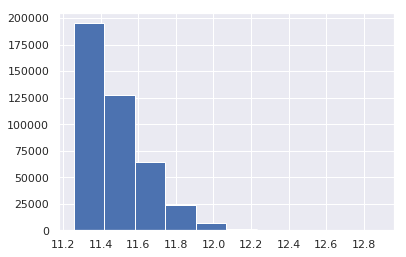

In [33]:
plt.hist(shuffled_cat['gal_smass'])

(array([  9.18000000e+02,   9.91000000e+02,   5.90000000e+01,
          1.13500000e+03,   2.91800000e+03,   5.94800000e+03,
          1.80710000e+04,   5.95980000e+04,   1.14033000e+05,
          2.16329000e+05]),
 array([ 10.00875948,  10.11532879,  10.22189809,  10.3284674 ,
         10.43503671,  10.54160601,  10.64817532,  10.75474463,
         10.86131394,  10.96788324,  11.07445255]),
 <a list of 10 Patch objects>)

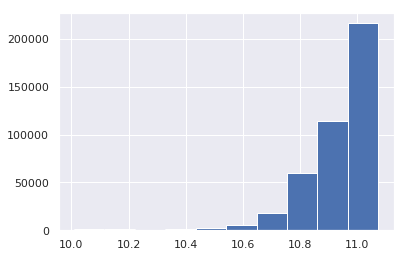

In [35]:
plt.hist(vpeak_cat['gal_smass'])

In [7]:
rbins = np.logspace(-1, 1.5, 15)
rpoints = (rbins[1:]+rbins[:-1])/2

In [8]:
pos = np.c_[vpeak_cat['halo_x'], vpeak_cat['halo_y'],vpeak_cat['halo_z']]
vpeak_xi = tpcf(pos, rbins, period=1000.0)

In [9]:
pos = np.c_[mpeak_cat['halo_x'], mpeak_cat['halo_y'],mpeak_cat['halo_z']]
mpeak_xi = tpcf(pos, rbins, period=1000.0)

In [10]:
pos = np.c_[shuffled_cat['halo_x'], shuffled_cat['halo_y'],shuffled_cat['halo_z']]
shuffled_xi = tpcf(pos, rbins, period=1000.0)

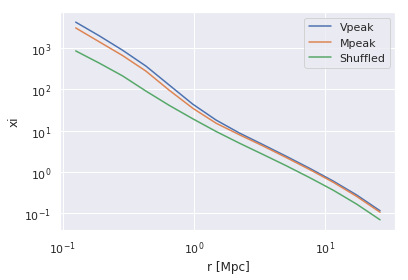

In [11]:
plt.plot(rpoints, vpeak_xi, label = 'Vpeak')
plt.plot(rpoints, mpeak_xi, label = 'Mpeak')
plt.plot(rpoints, shuffled_xi, label = 'Shuffled')

plt.loglog();
plt.legend(loc='best')
plt.xlabel('r [Mpc]')
plt.ylabel('xi')

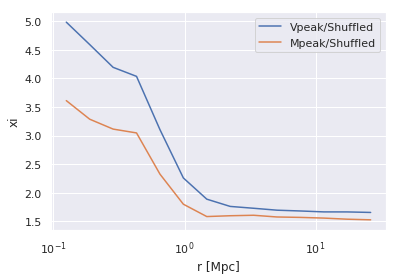

In [12]:
plt.plot(rpoints, vpeak_xi/shuffled_xi, label = 'Vpeak/Shuffled')
plt.plot(rpoints, mpeak_xi/shuffled_xi, label = 'Mpeak/Shuffled')

plt.xscale('log');
plt.legend(loc='best')
plt.xlabel('r [Mpc]')
plt.ylabel('xi')

In [13]:
%%bash
ls /home/users/swmclau2/Git/pearce/bin/shams/catalog*.npy -ltr

-rw-r--r-- 1 swmclau2 kipac 675 Apr  4 12:07 /home/users/swmclau2/Git/pearce/bin/shams/catalog_ab_halo_mpeak_shuffled_cen_hod.npy
-rw-r--r-- 1 swmclau2 kipac 675 Apr  4 12:07 /home/users/swmclau2/Git/pearce/bin/shams/catalog_ab_halo_mpeak_shuffled_sat_hod.npy
-rw-r--r-- 1 swmclau2 kipac 675 Apr  4 12:45 /home/users/swmclau2/Git/pearce/bin/shams/catalog_ab_halo_vmax@mpeak_catalog_cen_hod.npy
-rw-r--r-- 1 swmclau2 kipac 675 Apr  4 12:45 /home/users/swmclau2/Git/pearce/bin/shams/catalog_ab_halo_vmax@mpeak_catalog_sat_hod.npy
-rw-r--r-- 1 swmclau2 kipac 675 Apr  4 13:24 /home/users/swmclau2/Git/pearce/bin/shams/catalog_ab_halo_mpeak_catalog_cen_hod.npy
-rw-r--r-- 1 swmclau2 kipac 675 Apr  4 13:24 /home/users/swmclau2/Git/pearce/bin/shams/catalog_ab_halo_mpeak_catalog_sat_hod.npy


In [14]:
#scratch_path = '/home/users/swmclau2/scratch/'
#halo_catalog  = astropy.table.Table.read(scratch_path+'catalog_ab_%s_large.hdf5'%('halo_mpeak'), format = 'hdf5')
#mass_bins = compute_mass_bins(halo_catalog['halo_mvir'], 0.2)
mass_bins = np.loadtxt('ds_mass_bins.npy')
mass_bin_centers = (mass_bins[1:]+mass_bins[:-1])/2.0


In [17]:
hod_dict = {}
for catname in ['mpeak_catalog', 'vmax@mpeak_catalog', 'mpeak_shuffled']:
    hod_dict[catname] = {}
    for hodname in ['cen', 'sat']:
        hod_dict[catname][hodname] = np.loadtxt('/home/users/swmclau2/Git/pearce/bin/shams/catalog_ab_halo_%s_%s_hod.npy'%(catname, hodname))

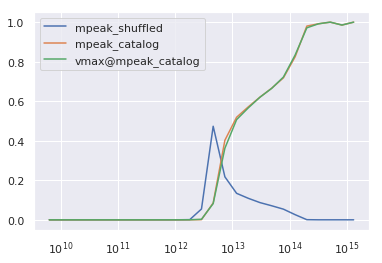

In [21]:
type = 'cen'
for name, type_dict in hod_dict.iteritems():
    plt.plot(mass_bin_centers, type_dict[type], label = name)
    
plt.legend(loc = 'best')
plt.xscale('log')
plt.show()

In [30]:
hod_dict['mpeak_shuffled']['cen']

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.34988301e-07,   7.40888402e-07,   3.97500271e-07,
         5.62197362e-07,   1.59133401e-06,   2.22500463e-06,
         3.68970248e-06,   2.80752930e-05,   1.46722160e-04,
         9.35751757e-04,   5.47411727e-02,   4.73287367e-01,
         2.17436517e-01,   1.34057604e-01,   1.08766806e-01,
         8.70489451e-02,   7.10503955e-02,   5.39263924e-02,
         2.60312945e-02,   6.84697022e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

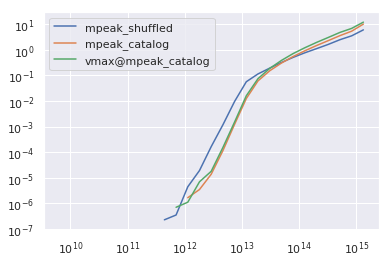

In [25]:
type = 'sat'
for name, type_dict in hod_dict.iteritems():
    plt.plot(mass_bin_centers, type_dict[type], label = name)
    
plt.legend(loc = 'best')
plt.loglog()
plt.show()

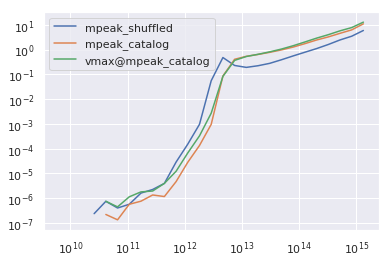

In [28]:
for name, type_dict in hod_dict.iteritems():
    plt.plot(mass_bin_centers, type_dict['cen']+type_dict['sat'], label = name)
    
plt.legend(loc = 'best')
plt.loglog()
#plt.xscale('log')
plt.show()